# Importing required libraries

In [285]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading Image

In [286]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img


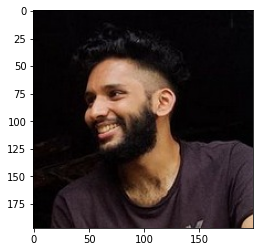

In [287]:
filename = "aman smiling.jpeg"
img = read_file(filename)

org_img = np.copy(img)

# Creating Edge Mask

In [288]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    return edges

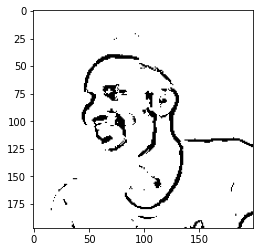

In [289]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="gray")
plt.show()

# Reducing the Color Palette

In [290]:
def color_quantization(img,k):
    # Transforming the image
    data = np.float32(img).reshape((-1,3))
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    # Implementing K-means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result


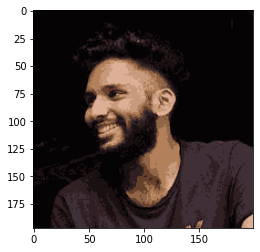

In [291]:
img = color_quantization(img,k=9)
plt.imshow(img)
plt.show()




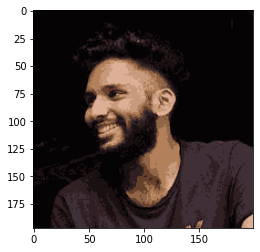

In [292]:
#Reduce the noise

blurred = cv2.bilateralFilter(img, d=3,sigmaColor=200, sigmaSpace=200)

plt.imshow(img)
plt.show()

# Combining Edge Mask with the Quantized Image

In [293]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    

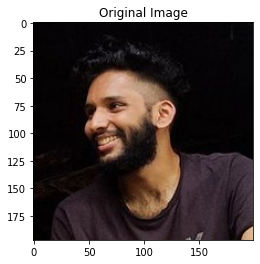

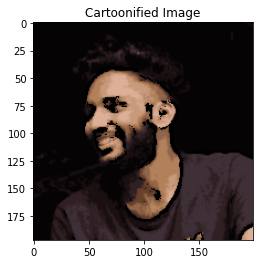

In [294]:
cartoon()